In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [36]:
#loading dataset
train_data= pd.read_csv('sign_mnist_train.csv')
test_data=pd.read_csv('sign_mnist_test.csv')

In [37]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [38]:
train_data.shape

(27455, 785)

#### The above data set is given in the form of labels and pixel value ranging from pixel 1 to pixel 784 which is 28 * 28 image.

In [39]:
labels=train_data['label'].values
labels

array([ 3,  6,  2, ..., 18, 17, 23])

In [40]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

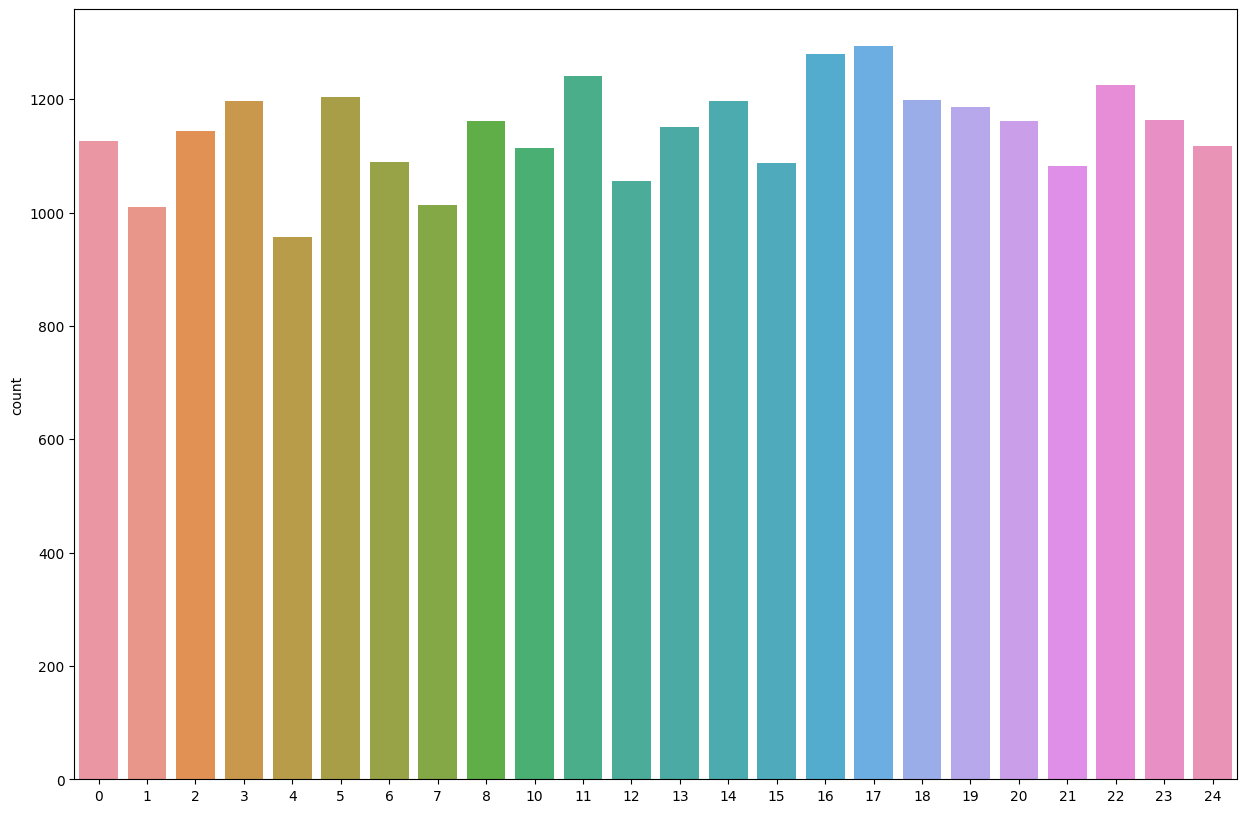

In [41]:
#showing the number of observations in each category
plt.figure(figsize=(15,10))
sns.countplot(x=labels)
plt.show()

#### Each label is almost equally distributed, so we have no need to resample the dataset.

In [42]:
#dropping the label column from the training dataset
sign_images=train_data.drop('label', axis=1, inplace=True)

In [43]:
#reshaping the images
images=train_data.values
images=np.array([np.reshape(i, (28,28)) for i in images])
images=np.array([i.flatten() for i in images])

In [44]:
#reshaping the target variable
from sklearn.preprocessing import LabelBinarizer

lb=LabelBinarizer()
labels=lb.fit_transform(labels)

In [45]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

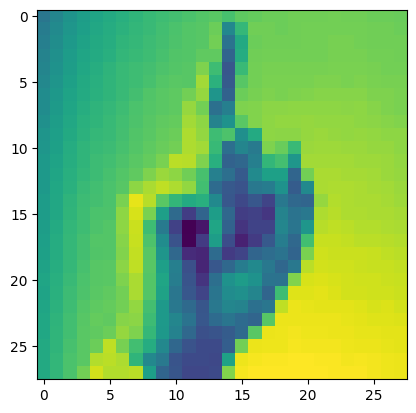

In [46]:
plt.imshow(images[0].reshape(28,28))

In [47]:
#spliting the training dataset into two parts--tarin and test
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test=tts(images, labels, test_size=0.3, random_state=100)

In [48]:
print(x_train.shape)
print(x_test.shape)

(19218, 784)
(8237, 784)


In [49]:
#scale our images
x_train=x_train/255
x_test=x_test/255

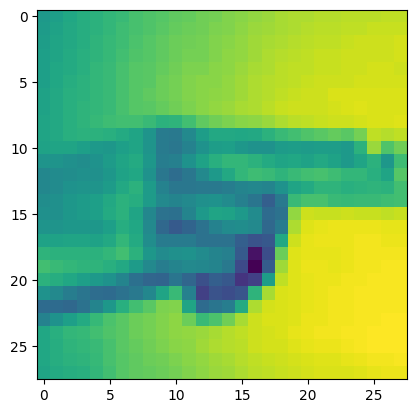

In [50]:
x_train=x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test=x_test.reshape(x_test.shape[0], 28, 28, 1)

#Visualizing the image after normalizing
plt.imshow(x_train[0].reshape(28, 28))
plt.show()

### Implementation of CNN model

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [52]:
#hyperparameters
batch_size=128
num_classes=24
epochs=50

In [53]:
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam


model=Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation='softmax'))

In [54]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [55]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

In [56]:
#train the model
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs= epochs, batch_size=batch_size)

Epoch 1/50
151/151 [==============================] - 32s 202ms/step - loss: 2.5022 - accuracy: 0.2361 - val_loss: 1.4272 - val_accuracy: 0.5689
Epoch 2/50
151/151 [==============================] - 29s 195ms/step - loss: 1.1379 - accuracy: 0.6162 - val_loss: 0.7080 - val_accuracy: 0.7690
Epoch 3/50
151/151 [==============================] - 30s 196ms/step - loss: 0.6916 - accuracy: 0.7614 - val_loss: 0.4457 - val_accuracy: 0.8637
Epoch 4/50
151/151 [==============================] - 30s 201ms/step - loss: 0.4665 - accuracy: 0.8404 - val_loss: 0.2908 - val_accuracy: 0.9165
Epoch 5/50
151/151 [==============================] - 29s 195ms/step - loss: 0.3089 - accuracy: 0.8967 - val_loss: 0.2021 - val_accuracy: 0.9352
Epoch 6/50
151/151 [==============================] - 29s 194ms/step - loss: 0.2087 - accuracy: 0.9319 - val_loss: 0.1075 - val_accuracy: 0.9724
Epoch 7/50
151/151 [==============================] - 30s 202ms/step - loss: 0.1420 - accuracy: 0.9570 - val_loss: 0.0700 - val_ac

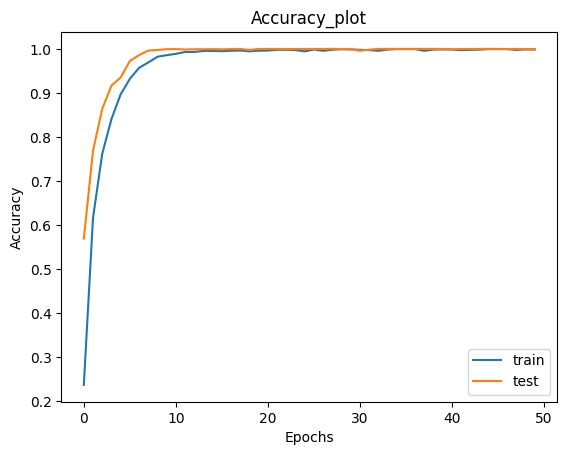

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy_plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

plt.show()

#### As the number of epochs increase, accuracy also increases.

#### Now let's validate with the test data

In [58]:
test_labels=test_data['label']
test_data.drop('label', axis=1, inplace=True)

In [59]:
test_images=test_data.values
test_images=np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images=np.array([i.flatten() for i in test_images])

test_labels=lb.fit_transform(test_labels)

test_images=test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

(7172, 28, 28, 1)

In [60]:
test_labels.shape

(7172, 24)

In [61]:
y_pred=model.predict(test_images)

225/225 [==============================] - 3s 12ms/step


In [62]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.8459286112660346